#### Daniel Diamont (dd28977)
#### John Sigmon (js85773)


# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 65</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0 - Bayes Decision Theory (10pts)
(From HW3)

#### a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

**Data Prior:** $ p(x) $ is the probability distribution of the data. In the context of a classification problem, X consists of our data points, and we try to estimate a probablity densitity funciton $ p_{X}(x) $ that we can use for classification.

**Class Prior:** $ p(C_{i}) $ represents our prior beliefs about the probability distributions for each class.

**Class-conditional likelihood:** $ p(x_{i}|C) $ represents what we believe the probability distribution of our dataset $ X $ looks like given our prior beliefs about the distrubition of the classes.

**Posterior:** Using Bayes Rule, $ p(C_i|x) $ will yield the probability that some point from our dataset belongs to a particular class $ C_i $.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

![Imgur](https://i.imgur.com/XosVqJz.png)

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary on the same plot.

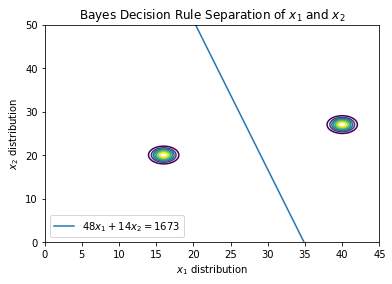

In [1]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
u0 = np.array((16, 20)) # class 0
u1 = np.array((40, 27)) # class 1
cov = np.identity(2)
pxc0 = multivariate_normal(u0, cov)
pxc1 = multivariate_normal(u1, cov)
x = np.linspace(0,45,500)
y = np.linspace(0,40,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
plt.contour(X,Y, pxc0.pdf(pos))
plt.contour(X,Y, pxc1.pdf(pos))
plt.title("Bayes Decision Rule Separation of $ x_{1} $ and $ x_{2} $")
plt.xlabel("$ x_{1} $ distribution")
plt.ylabel("$ x_{2} $ distribution")
plt.plot(x, 1673/14 - 48*x/14, label="$ 48x_{1} + 14x_{2} = 1673 $")
plt.ylim((0,50))
plt.legend(loc=3)
plt.show()

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

In [6]:
import pandas as pd
data = [["C1", 0, 6, 2], ["C2", 4, 0, 2]]
df = pd.DataFrame(data, columns=["Truth", "Decision C1", "Decision C2", "Decision Reject"])
df.set_index("Truth")

,Decision C1,Decision C2,Decision Reject
Truth,,,
C1,0,6,2
C2,4,0,2


In [3]:
alpha = np.linspace(0,1,500)

In [4]:
call_class1 = alpha*(0) + (1-alpha)*4
call_class2 = alpha*(6) + (1-alpha)*0
reject = 1 - (2/((1-alpha)*4))

/home/test/data_science_principles/.env/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


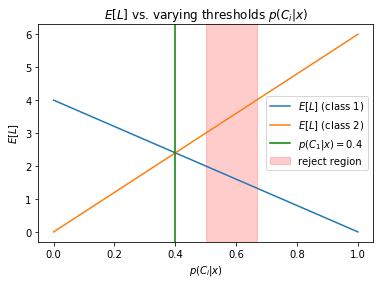

In [163]:
plt.plot(alpha, call_class1, label="$ E[L] $ (class 1)")
plt.plot(alpha, call_class2, label="$ E[L] $ (class 2)")
plt.xlabel("$ p(C_{i}|x) $")
plt.ylabel("$ E[L] $")
plt.axvline(x=0.4, color='g', label="$ p(C_{1}|x) = 0.4 $")
plt.axvspan(1/2, 2/3, alpha=0.2, color='red', label='reject region')
plt.title("$ E[L] $ vs. varying thresholds $ p(C_{i}|x) $")
plt.legend()
plt.show()


Given the above graph, it is *cheaper* to call it class 1 when $ p(C_{i}|x) > 0.4 $

Additionally, it is *best* to take the reject option when $ \frac{1}{2} <= p(C_{i}|x) <= \frac{2}{3} $

# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

## Answer

1.) A lift chart is very similar to Roc. The lift chart is derived from the cumulative gains chart; the values on the y axis correspond to the ratio of the cumulative gain for each curve to the baseline. 

Direct marketing (DM) paradigm focuses on predicting economic behavior of a group of customers in order to
predict and reduce attrition, predict likely responders, risk analysis, and fraud detection. The applications of such
models are very apt in Financial Service Industry, Telecom, large Retailers, Direct Mail, email commerce etc.
Validating the performance of a model is a critical step in the campaign process.
The cumulative gains and lift charts is an excellent way to show the performance of a model. The lift, a measure of
the effectiveness of predictive model, is calculated as the ratio between the results obtained with and without the
predictive model. The lift chart shows the likelihood of respondents from customers based on the predictive model
and randomly chosen list of customers.


2.)There are many cases where the calibration of the classifier is very important. Take for example some classifier that is supposed to detect hazardous objects in a computer vision scenario. In this case we very much care if there is some probability of a hazardous object even if it is not the most likely. In an instance where our classifier predicts  identification for an object as 15%,  but there is also a 12% chance that this object is a hazard,  your classifier should probably report that information back because you would want to use it to make more informed decisions. In this scenario, calibrating the classifier would be very important.


# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

In [72]:
# Alternatively, if you have trouble running fetch_mldata(), you can run this cell to get X_train, y_train, X_test, and y_test
# I.e., run this cell OR the above 3 to continue with answering this problem.

%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('q3_data.pickle', 'rb') as handle:
    data1 = pickle.load(handle)

X_train = data1['X_train']
y_train = data1['y_train']
X_test = data1['X_test']
y_test = data1['y_test']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11742, 784) (11742,) (2041, 784) (2041,)


#### feature exploration

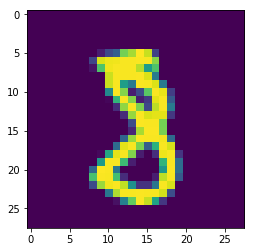

In [73]:
plt.imshow((X_train[3600]).reshape(28,28))

In [77]:
y_train[3600]

0.0

In [82]:
print(y_train)

[0. 1. 0. ... 1. 0. 1.]


In [79]:
X_8 = X_train[y_train == 0]
X_9 = X_train[y_train == 1]

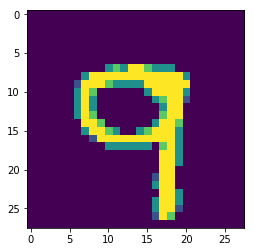

In [81]:
plt.imshow(X_9[0].reshape(28,28))

Looks like we have 11742 numbers, and the numbers are described by 28x28 (784) images. The labels y = 0 if X == 8 and y = 1 if X == 9

#### Answers

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

In [151]:
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
_ = lr.fit(X_train, y_train)

In [152]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
_ = gnb.fit(X_train, y_train)

In [153]:
# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
_ = mlp.fit(X_train, y_train)

In [154]:
# extract probabilities
pr_lr = lr.predict_proba(X_train)
pr_gnb = gnb.predict_proba(X_train)
pr_mlp = mlp.predict_proba(X_train)

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

In [155]:
from sklearn.metrics import roc_curve
fpr_lr , tpr_lr , _  = roc_curve(y_train, pr_lr[:,1])
fpr_gnb, tpr_gnb, _ = roc_curve(y_train, pr_gnb[:,1])
fpr_mlp, tpr_mlp, _ = roc_curve(y_train, pr_mlp[:,1])

In [156]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([-0.01,1.01,-0.01,1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

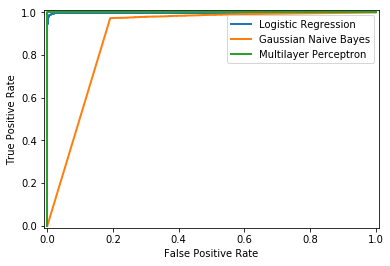

In [157]:
plot_roc_curve(fpr_lr, tpr_lr, label='Logistic Regression')
plot_roc_curve(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes')
plot_roc_curve(fpr_mlp, tpr_mlp, label='Multilayer Perceptron')
plt.legend()
plt.show()

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.


In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# accuracy scores
acc_lr = lr.predict(X_train)
acc_gnb = gnb.predict(X_train)
acc_mlp = mlp.predict(X_train)

print('Logister Regression:\nAUC: {:.5f}\tAccuracy: {:.5f}' \
      .format(roc_auc_score(y_train, pr_lr[:,1]), accuracy_score(y_train, acc_lr)))
print('\nGaussian Naive Bayes\nAUC: {:.5f}\tAccuracy: {:.5f}' \
      .format(roc_auc_score(y_train, pr_gnb[:,1]), accuracy_score(y_train, acc_gnb)))
print('\nMultilayer Perceptron\nAUC: {:.5f}\tAccuracy: {:.5f}' \
      .format(roc_auc_score(y_train, pr_mlp[:,1]), accuracy_score(y_train, acc_mlp)))

Logister Regression:
AUC: 0.99943	Accuracy: 0.99046

Gaussian Naive Bayes
AUC: 0.89357	Accuracy: 0.87302

Multilayer Perceptron
AUC: 1.00000	Accuracy: 1.00000


4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

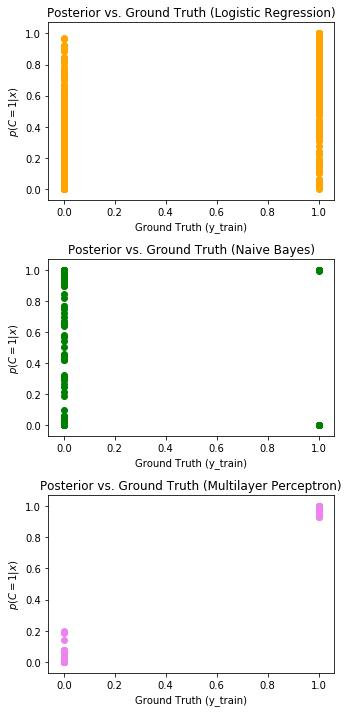

In [159]:
plt.figure(figsize=(5,10))

# Logistic Regression Scatter
plt.subplot(311)
plt.scatter(y_train, pr_lr[:,1], color='orange')
plt.xlabel('Ground Truth (y_train)')
plt.ylabel('$ p(C = 1 | x) $')
plt.title('Posterior vs. Ground Truth (Logistic Regression)')

# Naive Bayes
plt.subplot(312)
plt.scatter(y_train, pr_gnb[:,1], color='green')
plt.xlabel('Ground Truth (y_train)')
plt.ylabel('$ p(C = 1 | x) $')
plt.title('Posterior vs. Ground Truth (Naive Bayes)')

# MLP
plt.subplot(313)
plt.scatter(y_train, pr_mlp[:,1], color='violet')
plt.xlabel('Ground Truth (y_train)')
plt.ylabel('$ p(C = 1 | x) $')
plt.title('Posterior vs. Ground Truth (Multilayer Perceptron)')

plt.tight_layout()
plt.show()

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

The MLP Posterior probability calls out true negatives and true positives very well. The probabilities are clustered around the ground truth.

The Logistic Regression posterior probability appears to be spread more or less uniformly between 0 and 1 for negatives and positives, meaning our logistic regression classifier will make a lot of misclassifications (false negatives and false positives) at a somewhat equal rate.

The Naive Bayes posterior probability appears to be spread more or less uniformly between 0 and 1 over the negative of the ground truth, and the positive has one data point as a true positive and one data point as a false negative. This means that the model is in favor of calling out positives (whether true or false). It favors predicting '9' out of the images.